# Plotly（オブジェクト指向）

ライブラリのインポート

In [1]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

## 散布図

In [2]:
# データの読み込み
scatter_df = pd.read_csv("../data/boston.csv")
scatter_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
graph = go.Scatter(
    x=scatter_df["rm"],
    y=scatter_df["lstat"],
    mode="markers",
)

layout = go.Layout(
    width=700,
    height=500,
    title="Boston house price (medv)",
    xaxis=dict(
        title="average number of rooms per dweling (rm)",
        linewidth=1, mirror=True
    ),  # x軸の設定
    yaxis=dict(
        title="lower status of the population (lstat)"
    ),    # y軸の設定
    font=dict(size=18, family="sans-serif"),                       # フォントの設定
    template="simple_white"
)

fig = go.Figure(data=graph, layout=layout)
fig.show()

## バブルチャート

In [4]:
graph = go.Scatter(
    x=scatter_df["rm"],
    y=scatter_df["lstat"],
    mode="markers",
    marker=dict(
        size=scatter_df["medv"]/3,
        color=scatter_df["medv"],
        colorscale="reds",
        showscale=True)
)

layout = go.Layout(
    width=700,
    height=500,
    title="Boston house price (medv)",
    xaxis=dict(title="average number of rooms per dweling (rm)"),
    yaxis=dict(title="lower status of the population (lstat)"),
    font=dict(size=18, family="sans-serif"),
    template="simple_white"
)

fig = go.Figure(data=graph, layout=layout)
fig.show()

## 棒グラフ

`axis.bar`の引数

- x (float or 配列)：棒のx座標
- height (float or 配列)：棒の高さ
- width (float or 配列)：棒の幅
- bottom (float or 配列)：棒のy座標の始点
- align (文字列)：x座標にどう配置するか．centerかedge
- xerr, yerr (float or 配列)：エラーバー．数値に合わせて+/-のサイズで作成
- color (color or color配列)：棒の色
- edgecolor (color or color配列)：棒の枠の色
- linewidth (float)：枠の線の太さ
- ecolor (color or color配列)：エラーバーの色
- capsize (float)：エラーバーの傘部分のサイズ
- log (bool)：TrueかFalseで対数スケール
- hatch (配列)：棒にマークを付ける

In [5]:
bar_df = pd.read_csv(
    "../data/city_temperature.csv",
    sep="\t",              # タブ区切りのデータを取得
    index_col=None,
    parse_dates=["date"],  # 文字列から日付データに変換したい列名
    date_format="%Y%m%d"   # 日付データのフォーマット 例) 20111001 -> 2011-10-01
)

bar_df = bar_df.set_index("date")

ny_temp = bar_df["New York"].resample("ME").mean()
sf_temp = bar_df["San Francisco"].resample("ME").mean()
austin_temp = bar_df["Austin"].resample("ME").mean()

bar_df = pd.DataFrame(
    data={"New York": ny_temp, "San Francisco": sf_temp, "Austin": austin_temp}
)
month = bar_df.index.month

bar_df

,New York,San Francisco,Austin
date,,,
2011-10-31,58.083871,59.400000,68.800000
2011-11-30,50.843333,53.070000,61.446667
2011-12-31,43.174194,50.209677,50.816129
2012-01-31,37.387097,50.948387,53.083871
2012-02-29,40.479310,51.124138,55.765517
2012-03-31,48.067742,50.870968,64.712903
2012-04-30,53.910000,52.826667,71.706667
2012-05-31,63.254839,52.990323,76.564516
2012-06-30,70.546667,55.233333,83.010000


In [6]:
fig = plt.figure()
ax = fig.add_subplot()

ax.bar(
    x=month,
    height=bar_df["New York"],
)

ax.set_xticks(month)
ax.set_title("NYの気温（月別平均）")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature [F]")
plt.show()

NameError: name 'plt' is not defined

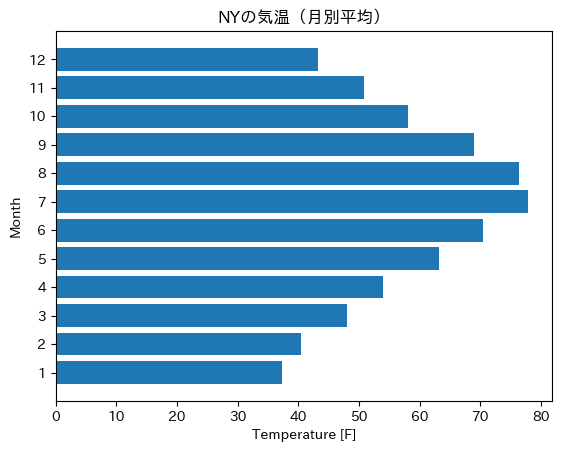

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.barh(
    y=month,
    width=bar_df["New York"],
)

ax.set_yticks(month)
ax.set_title("NYの気温（月別平均）")
ax.set_xlabel("Temperature [F]")
ax.set_ylabel("Month")
plt.show()

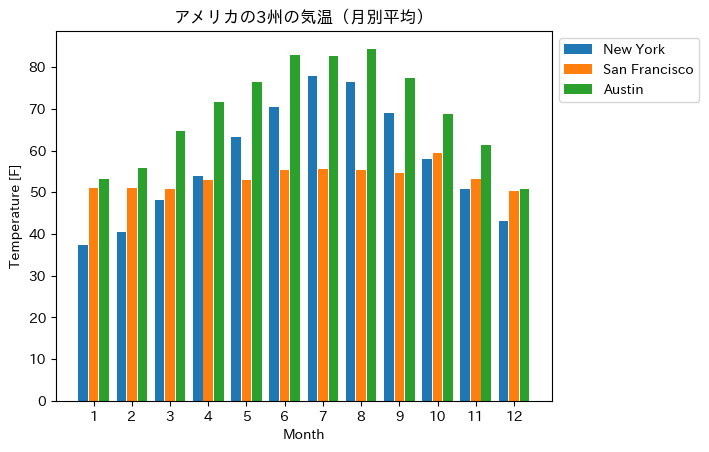

In [ ]:
width = 0.25
gap = width / 10
shift = width + gap

fig = plt.figure()
ax = fig.add_subplot()

ax.bar(
    x=month - shift,
    height=bar_df["New York"],
    label="New York",
    width=width
)
ax.bar(
    x=month, 
    height=bar_df["San Francisco"], 
    label="San Francisco", 
    width=width
)
ax.bar(
    x=month + shift,
    height=bar_df["Austin"],
    label="Austin",
    width=width
)
ax.set_xticks(month)
ax.set_title("アメリカの3州の気温（月別平均）")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature [F]")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

## 積み重ね棒グラフ

In [ ]:
stacked_bar_df = pd.read_csv("../data/japan_energy.csv", index_col=0)
stacked_bar_df.head()

,石油,石炭,天然ガス,原子力,水力,新エネルギー・地熱等
年度,,,,,,
1965,3.56,1.87,0.08,0.00,0.75,0.11
1966,4.13,1.92,0.09,0.01,0.77,0.11
1967,5.11,2.29,0.09,0.01,0.67,0.11
1968,5.95,2.42,0.10,0.01,0.72,0.12
1969,7.19,2.59,0.12,0.01,0.73,0.13


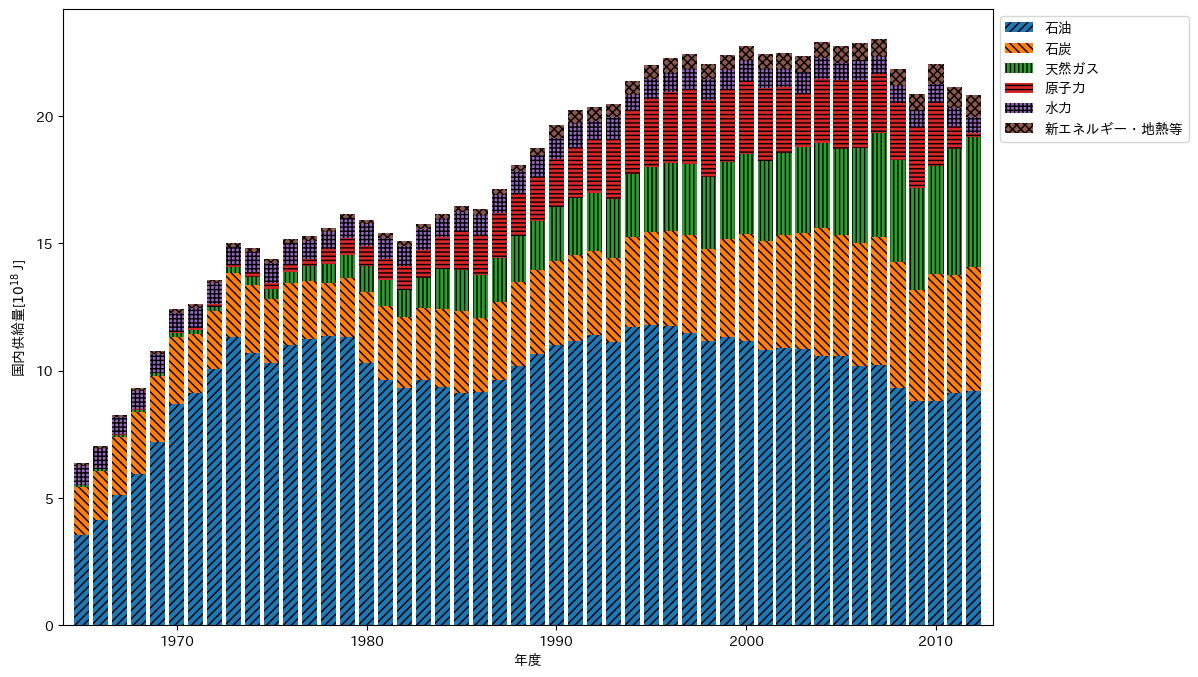

In [ ]:
# hatchの細かさは"/"などの数を増やすことで細かくすることができる。ここでは全て4番目の細かさ
hatch_patterns = [ "////" , "\\\\\\\\" , "||||" , "----" , "++++" , "xxxx", "oooo", "OOOO", "....", "****" ]
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()
bottom = np.zeros(stacked_bar_df.index.shape)

for i, enegy_type in enumerate(stacked_bar_df.columns):
    ax.bar(
        x=stacked_bar_df.index,
        height=stacked_bar_df[enegy_type],
        bottom=bottom,
        label=enegy_type,
        hatch=hatch_patterns[i]
        )
    bottom += stacked_bar_df[enegy_type]

ax.set_xlabel("年度")
ax.set_ylabel("国内供給量[$10^{18}$ J]")
ax.set_xlim([1964, 2013])
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))  # 凡例を外側に
plt.show()

## 折れ線グラフ

In [ ]:
# プロット用のデータ取得

plot_df = pd.read_csv(
    "../data/city_temperature.csv",
    sep="\t",              # タブ区切りのデータを取得
    index_col=None,
    parse_dates=["date"],  # 文字列から日付データに変換したい列名
    date_format="%Y%m%d"   # 日付データのフォーマット 例) 20111001 -> 2011-10-01
)

# データの確認
plot_df.head()

,date,New York,San Francisco,Austin
0,2011-10-01,63.4,62.7,72.2
1,2011-10-02,58.0,59.9,67.7
2,2011-10-03,53.3,59.1,69.4
3,2011-10-04,55.7,58.8,68.0
4,2011-10-05,64.2,58.7,72.4


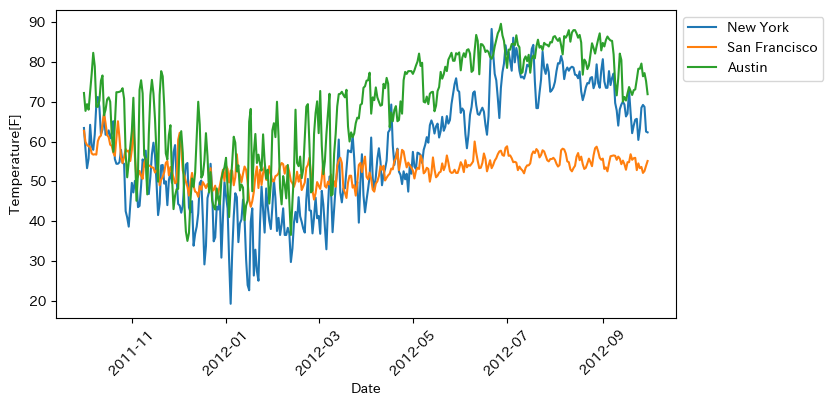

In [ ]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()

for city_name in plot_df.columns[1:]:
    ax.plot(
        plot_df["date"],     # x軸のデータ（日付データ）
        plot_df[city_name],  # y軸のデータ（気温データ）
        label=city_name      # 凡例の名前
    )
ax.tick_params(axis="x", labelrotation=45)  # 軸の回転
ax.set_xlabel("Date")
ax.set_ylabel("Temperature[F]")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

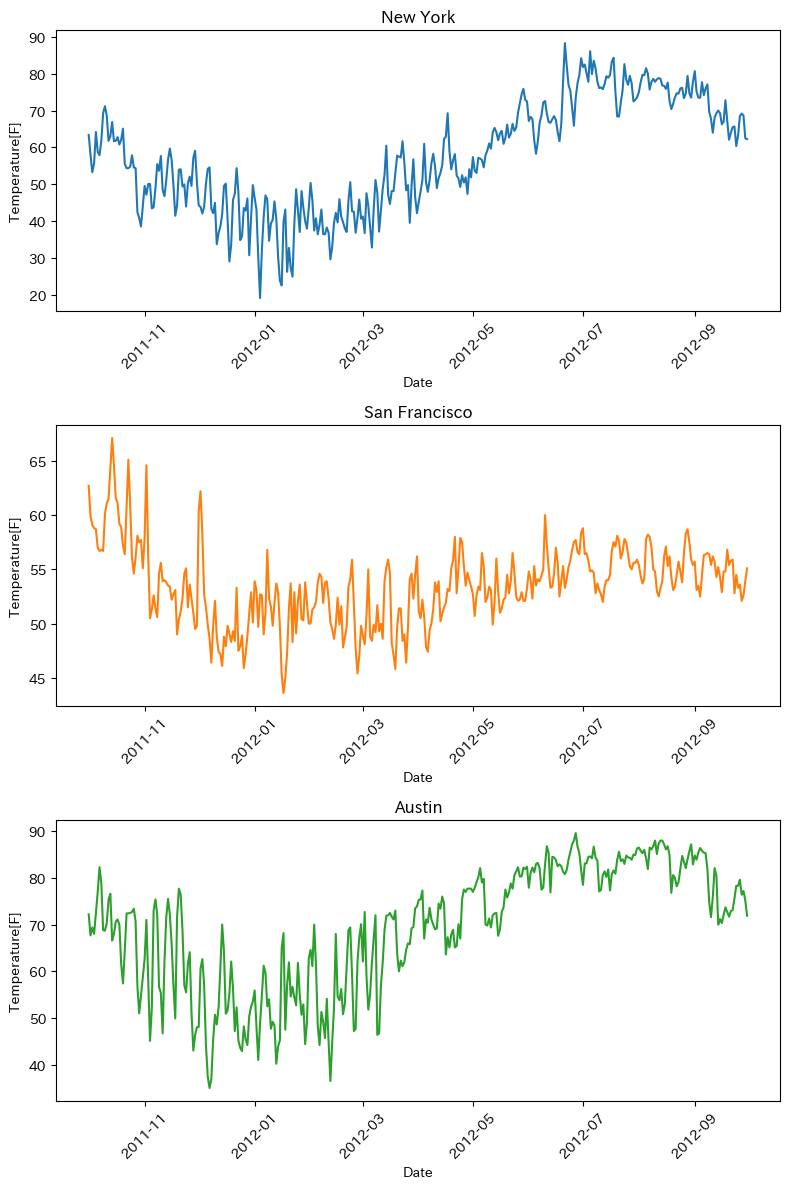

In [ ]:
fig = plt.figure(figsize=(8, 12))

for i, city_name in enumerate(plot_df.columns[1:]):
    ax = fig.add_subplot(3, 1, i+1)
    ax.plot(
        plot_df["date"],     # x軸のデータ
        plot_df[city_name],  # y軸のデータ
        color=list(mcolors.TABLEAU_COLORS.values())[i]
    )
    ax.tick_params(axis="x", labelrotation=45)  # x軸の回転
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature[F]")
    ax.set_title(city_name)
plt.tight_layout()
plt.show()

## 面グラフ

In [ ]:
stacked_area_df = pd.read_csv("../data/japan_energy.csv", index_col=0)
stacked_area_df.head()

,石油,石炭,天然ガス,原子力,水力,新エネルギー・地熱等
年度,,,,,,
1965,3.56,1.87,0.08,0.00,0.75,0.11
1966,4.13,1.92,0.09,0.01,0.77,0.11
1967,5.11,2.29,0.09,0.01,0.67,0.11
1968,5.95,2.42,0.10,0.01,0.72,0.12
1969,7.19,2.59,0.12,0.01,0.73,0.13


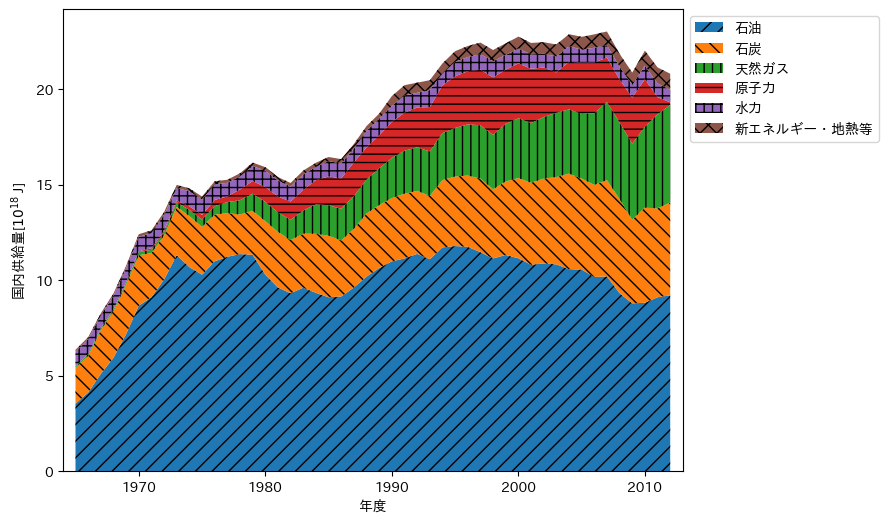

In [ ]:
hatch_patterns = [ "//" , "\\\\" , "||" , "--" , "++" , "xx", "oo", "OO", "..", "**" ]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

stacks = ax.stackplot(
    stacked_area_df.index,
    stacked_area_df.values.T,
    labels=list(stacked_area_df.columns)
)

for stack, hatch in zip(stacks, hatch_patterns):
    stack.set_hatch(hatch)
    
ax.set_xlabel("年度")
ax.set_ylabel("国内供給量[$10^{18}$ J]")
ax.set_xlim([1964, 2013])
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

## ツリーマップ

In [ ]:
tree_map_df = pd.read_csv("../data/japan_population.csv")
tree_map_df.head()

,都道府県,総人口(千人)
0,北海道,5140
1,青森,1204
2,岩手,1181
3,宮城,2280
4,秋田,930


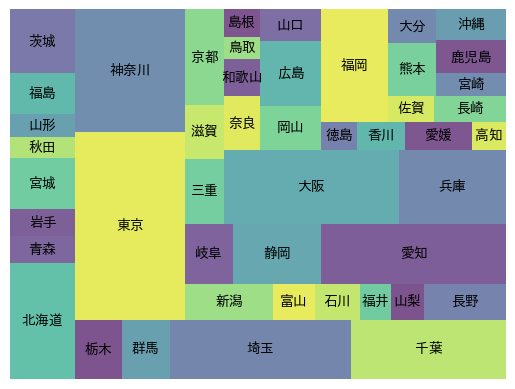

In [ ]:
import squarify

squarify.plot(
    sizes=tree_map_df.iloc[:, 1],
    label=tree_map_df.iloc[:, 0],
    alpha=0.7
)
plt.axis("off")
plt.show()

## 100%積み重ね棒グラフ

In [ ]:
stacked_bar_100_df = pd.read_csv("../data/japan_energy.csv", index_col=0)
# %に変換
stacked_bar_100_df = stacked_bar_100_df.div(stacked_bar_100_df.sum(axis=1), axis=0) * 100
stacked_bar_100_df.head()

,石油,石炭,天然ガス,原子力,水力,新エネルギー・地熱等
年度,,,,,,
1965,55.886970,29.356358,1.255887,0.000000,11.773940,1.726845
1966,58.748222,27.311522,1.280228,0.142248,10.953058,1.564723
1967,61.714976,27.657005,1.086957,0.120773,8.091787,1.328502
1968,63.841202,25.965665,1.072961,0.107296,7.725322,1.287554
1969,66.759517,24.048282,1.114206,0.092851,6.778087,1.207057


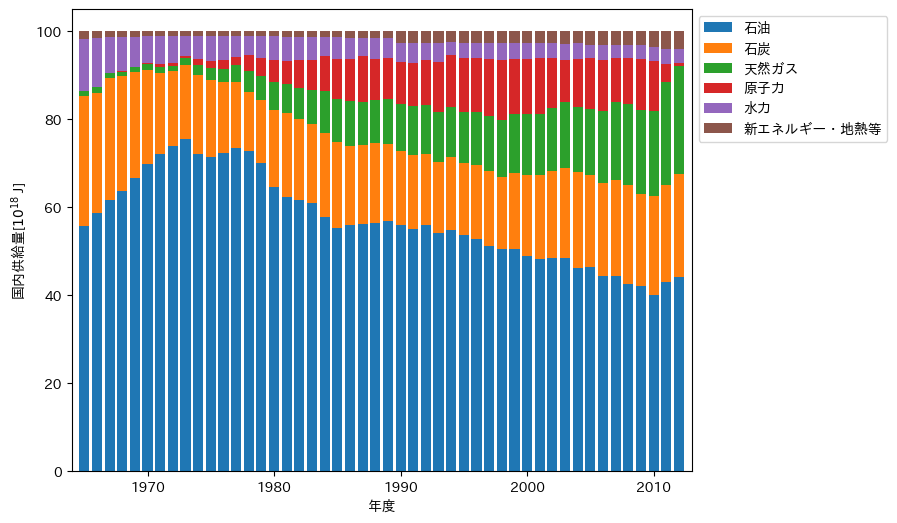

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
bottom = np.zeros(stacked_bar_100_df.index.shape)

for enegy_type in stacked_bar_df.columns:
    ax.bar(
        x=stacked_bar_100_df.index,
        height=stacked_bar_100_df[enegy_type],
        bottom=bottom,
        label=enegy_type
        )
    bottom += stacked_bar_100_df[enegy_type]

ax.set_xlabel("年度")
ax.set_ylabel("国内供給量[$10^{18}$ J]")
ax.set_xlim([1964, 2013])
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))  # 凡例を外側に
plt.show()

## 円グラフ

In [ ]:
pie_df = pd.read_csv("../data/japan_energy.csv", index_col=0)

pie_df = pie_df.loc[[1965, 2012], :]
pie_df = pie_df.div(pie_df.sum(axis=1), axis=0)

pie_df

,石油,石炭,天然ガス,原子力,水力,新エネルギー・地熱等
年度,,,,,,
1965,0.558870,0.293564,0.012559,0.000000,0.117739,0.017268
2012,0.442843,0.233429,0.244957,0.006724,0.031700,0.040346


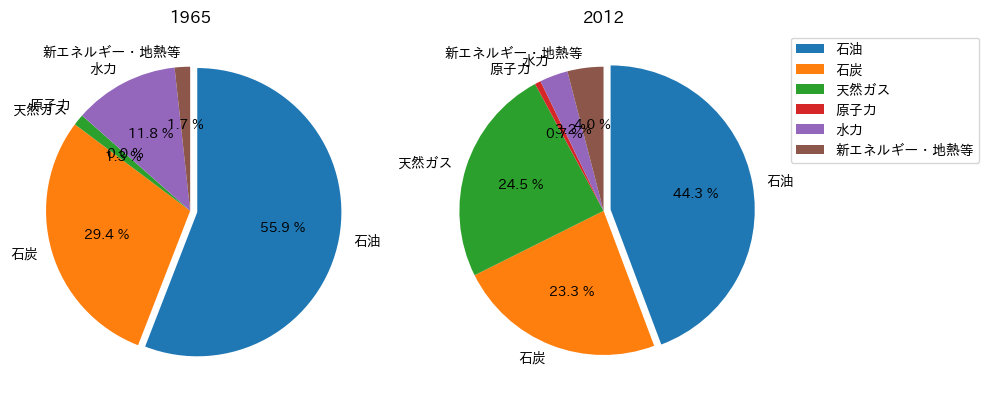

In [ ]:
fig = plt.figure(figsize=(10, 5))

for i, year in enumerate(pie_df.index):
    ax = fig.add_subplot(1, 2, i + 1)
    ax.pie(
        pie_df.loc[year, :],
        labels=pie_df.columns,
        counterclock=False,
        startangle=90,
        # rotatelabels=True,
        autopct="%1.1f %%",
        explode=[0.05] + [0 for _ in range(len(pie_df.columns) - 1)]
    )
    ax.set_title(year)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## ヒストグラム

In [ ]:
hist_df = pd.read_csv("../data/diamond.csv")
hist_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


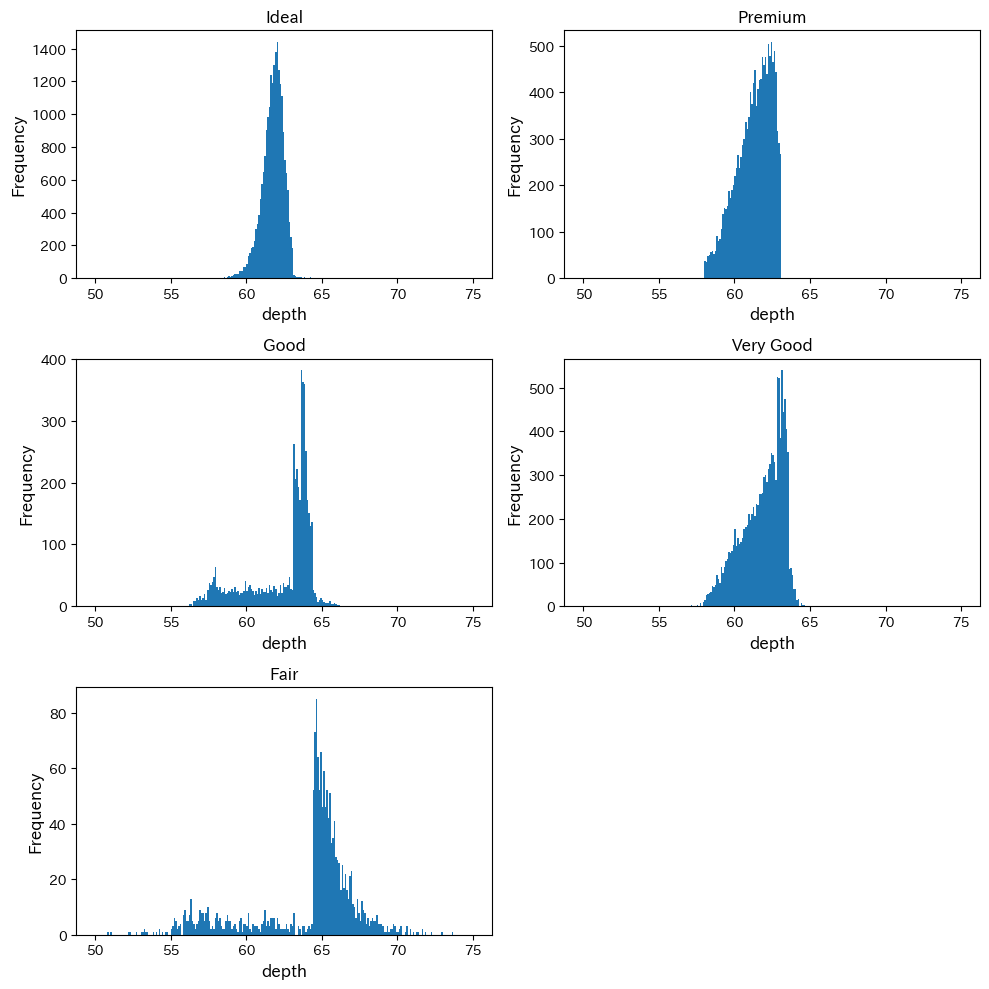

In [ ]:
fig = plt.figure(figsize=(10, 10))

for i, cut in enumerate(hist_df["cut"].unique()):
    ax = fig.add_subplot(3, 2, i+1)
    ax.hist(
        x=hist_df[hist_df["cut"]==cut]["depth"],
        bins=250,
        range=(50, 75)
    )
    ax.set_xlabel("depth", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.set_title(cut)
plt.tight_layout()
plt.show()

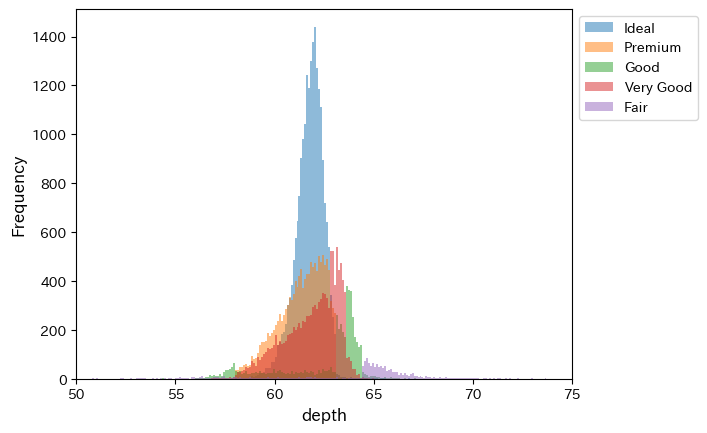

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

for cut in hist_df["cut"].unique():
    ax.hist(
        x=hist_df[hist_df["cut"]==cut]["depth"],
        range=(50, 75),
        bins=250,
        alpha=0.5,
        label=cut,
        histtype="stepfilled"
    )

ax.set_xlim([50, 75])
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)
ax.set_xlabel("depth", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
plt.show()

## 箱ひげ図

In [ ]:
box_plot_df = pd.read_csv("../data/iris.csv")
box_plot_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


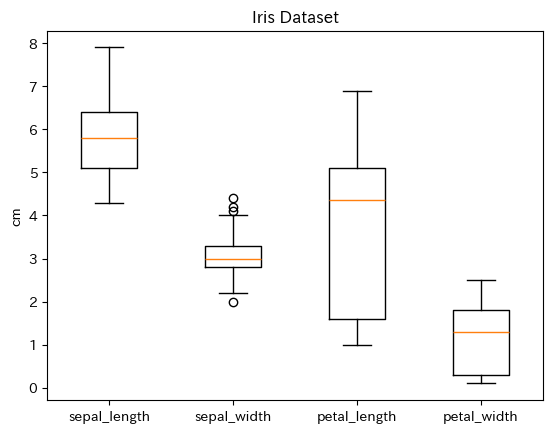

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.boxplot(
    x=[box_plot_df[col] for col in box_plot_df.columns[:-1]],
    labels=[col for col in box_plot_df.columns[:-1]]
)
ax.set_ylabel("cm")
ax.set_title("Iris Dataset")
plt.show()

## バイオリンプロット

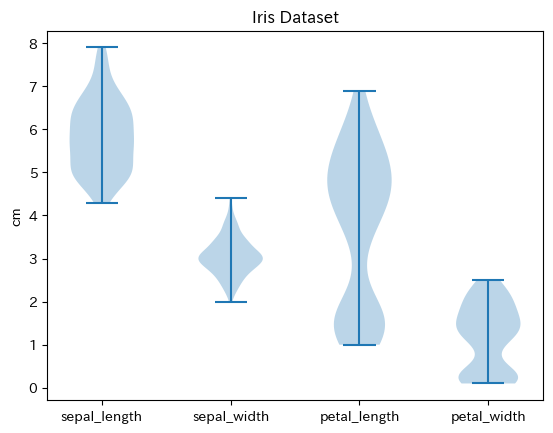

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.violinplot(
    dataset=[box_plot_df[col] for col in box_plot_df.columns[:-1]],
)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels([col for col in box_plot_df.columns[:-1]])
# ax.set_xticklabels(["a", "b", "c", "d"])
ax.set_ylabel("cm")
ax.set_title("Iris Dataset")
plt.show()

## ヒートマップ

In [ ]:
heatmap_df = pd.read_csv("../data/boston.csv").corr()
heatmap_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


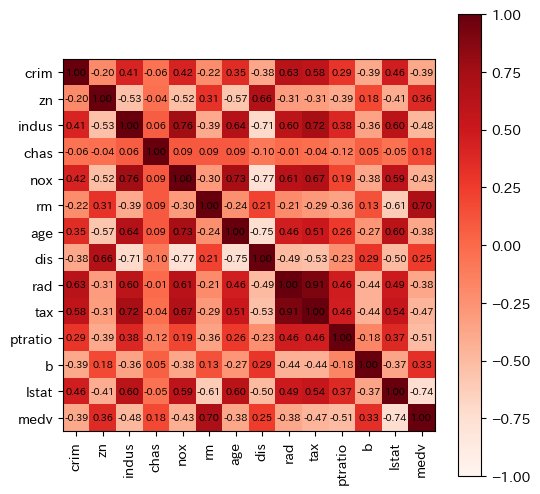

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.set_xticks([i for i in range(len(heatmap_df.columns))])
ax.set_yticks([i for i in range(len(heatmap_df.columns))])
ax.set_xticklabels(heatmap_df.columns)
ax.set_yticklabels(heatmap_df.index)
for i, col in enumerate(heatmap_df.columns):
    for j, idx in enumerate(heatmap_df.index):
        text = ax.text(
            x=i, y=j,
            s=f"{heatmap_df.iloc[i, j]:.2f}",
            size=7,
            ha="center",
            va="center",
            color="black"
        )
ax.tick_params(axis="x", labelrotation=90)  # 軸の回転
im = ax.imshow(X=heatmap_df, cmap="Reds", vmin=-1, vmax=1)
colorbar = fig.colorbar(im, ax=ax)
plt.show()
plt.show()